                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
Epoch 1/10


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


282/282 ━━━━━━━━━━━━━━━━━━━━ 99s 337ms/step - accuracy: 0.5477 - loss: 0.6760 - val_accuracy: 0.8290 - val_loss: 0.4831
Epoch 2/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 141s 333ms/step - accuracy: 0.7467 - loss: 0.5592 - val_accuracy: 0.7638 - val_loss: 0.5459
Epoch 3/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 140s 326ms/step - accuracy: 0.7346 - loss: 0.5382 - val_accuracy: 0.6585 - val_loss: 0.5831
Epoch 4/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 96s 342ms/step - accuracy: 0.7070 - loss: 0.5365 - val_accuracy: 0.8248 - val_loss: 0.4251
Epoch 5/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 96s 340ms/step - accuracy: 0.8037 - loss: 0.4510 - val_accuracy: 0.8515 - val_loss: 0.3923
Epoch 6/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 90s 317ms/step - accuracy: 0.8426 - loss: 0.3877 - val_accuracy: 0.8637 - val_loss: 0.3816
Epoch 7/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 88s 313ms/step - accuracy: 0.8583 - loss: 0.3591 - val_accuracy: 0.8748 - val_loss: 0.3137
Epoch 8/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 113s 400ms/step - accuracy: 0.8941 - loss: 0.2781 - 

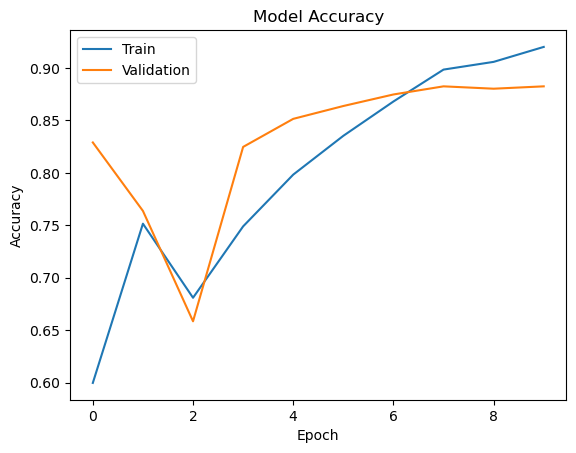

In [6]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("CSV/IMDB Dataset.csv")

# Display the first few rows of the dataset
print(data.head())

# Splitting the dataset into features and target variable
X = data['review']
y = data['sentiment']

# Encoding the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenizing the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding sequences to ensure uniform length
maxlen = 200
X_train_pad = pad_sequences(X_train_seq, padding='post', maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, padding='post', maxlen=maxlen)

# Building the neural network model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=maxlen))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Defining early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Training the model
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=128, validation_split=0.1, callbacks=[early_stopping])

# Evaluating the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print("Test Accuracy:", accuracy)

# Plotting training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
